<h3>Import Libraries</h3>

In [20]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

<h3>Import Dataset</h3>

In [21]:
mental = pd.read_csv("Mental-Health-Twitter.csv")
mental_dataset = mental.copy()

clean_d = pd.read_csv('clean_d_tweets.csv')
clean_d_dataset = clean_d.copy()

datd = pd.read_csv('datd_rand.csv')
datd_dataset = datd.copy()

tweets = pd.read_csv('Tweets.csv')
tweets_dataset = tweets.copy()

#Final Testing Dataset
# change path depending on where the dataset is stored
data = pd.read_csv("/Users/onilchibaya/Library/CloudStorage/OneDrive-SolPlaatjeUniversity/Machine Learning/Project/Code/Models/training.1600000.processed.noemoticon.csv",encoding='latin-1')
data

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


<h3>Drop Unnecesary Columns</h3>

In [22]:
#columns dropped from the clean_d_dataset
clean_d_dataset.drop('conversation_id', axis=1, inplace=True)
clean_d_dataset.drop('created_at', axis=1, inplace=True)
clean_d_dataset.drop('timezone', axis=1, inplace=True)
clean_d_dataset.drop('place', axis=1, inplace=True)
clean_d_dataset.drop('language', axis=1, inplace=True)
clean_d_dataset.drop('cashtags', axis=1, inplace=True)

clean_d_dataset.drop('hashtags', axis=1, inplace=True)
clean_d_dataset.drop('user_id', axis=1, inplace=True)
clean_d_dataset.drop('user_id_str', axis=1, inplace=True)
clean_d_dataset.drop('day', axis=1, inplace=True)
clean_d_dataset.drop('hour', axis=1, inplace=True)
clean_d_dataset.drop('geo', axis=1, inplace=True)
clean_d_dataset.drop('source', axis=1, inplace=True)
clean_d_dataset.drop('user_rt_id', axis=1, inplace=True)


clean_d_dataset.drop('thumbnail', axis=1, inplace=True)
clean_d_dataset.drop('quote_url', axis=1, inplace=True)
clean_d_dataset.drop('search', axis=1, inplace=True)
clean_d_dataset.drop('near', axis=1, inplace=True)
clean_d_dataset.drop('user_rt', axis=1, inplace=True)
clean_d_dataset.drop('retweet_id', axis=1, inplace=True)
clean_d_dataset.drop('reply_to', axis=1, inplace=True)
clean_d_dataset.drop('retweet_date', axis=1, inplace=True)
clean_d_dataset.drop('translate', axis=1, inplace=True)
clean_d_dataset.drop('trans_src', axis=1, inplace=True)
clean_d_dataset.drop('trans_dest', axis=1, inplace=True)

clean_d_dataset.drop('nlikes', axis=1, inplace=True)
clean_d_dataset.drop('nreplies', axis=1, inplace=True)
clean_d_dataset.drop('name', axis=1, inplace=True)
clean_d_dataset.drop('retweet', axis=1, inplace=True)
clean_d_dataset.drop('date', axis=1, inplace=True)
clean_d_dataset.drop('username', axis=1, inplace=True)
clean_d_dataset.drop('nretweets', axis=1, inplace=True)
clean_d_dataset.drop('link', axis=1, inplace=True)
clean_d_dataset.drop('urls', axis=1, inplace=True)
clean_d_dataset.drop('photos', axis=1, inplace=True)
clean_d_dataset.drop('video', axis=1, inplace=True)

#columns dropped from the tweets_dataset
tweets_dataset.drop('selected_text', axis=1, inplace=True)
tweets_dataset.drop('sentiment', axis=1, inplace=True)

#columns dropped from the mental_dataset
mental_dataset.drop("Unnamed: 0", axis=1, inplace=True)
mental_dataset.drop("post_id", axis=1, inplace=True)
mental_dataset.drop("post_created", axis=1, inplace=True)
mental_dataset.drop("followers", axis=1, inplace=True)
mental_dataset.drop("friends", axis=1, inplace=True)
mental_dataset.drop("favourites", axis=1, inplace=True)
mental_dataset.drop("statuses", axis=1, inplace=True)
mental_dataset.drop("retweets", axis=1, inplace=True)
mental_dataset.drop("label", axis=1, inplace=True)

<h3>Rename Columns Before Dataset Merge</h3>

In [23]:
mental_dataset.rename(columns = {'user_id':'id'}, inplace = True)
mental_dataset.rename(columns = {'post_text':'tweet'}, inplace = True)

datd_dataset.rename(columns = {'text':'tweet'}, inplace = True)
datd_dataset.rename(columns = {'label':'id'}, inplace = True)

tweets_dataset.rename(columns = {'text':'tweet'}, inplace = True)
tweets_dataset.rename(columns = {'textID':'id'}, inplace = True)

<h3>Dataset Merge</h3>

-   Shuffle the dataset and reset the index
-   Drop the old index column
-   Change dataframe column order

In [24]:
dataset = pd.concat([mental_dataset, clean_d_dataset, datd_dataset, tweets_dataset], join = 'inner', ignore_index = True)

#shuffle the dataset data and reset the index
dataset = dataset.sample(frac = 1).reset_index()

#drop the old index column.
dataset.drop(['index'], axis = 1, inplace = True)

#change dataframe column order
dataset = mental_dataset.loc[:,['id', 'tweet']]
dataset

,id,tweet
0,1013187241,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.
1,1013187241,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14..."
2,1013187241,Awake but tired. I need to sleep but my brain has other ideas...
3,1013187241,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…
4,1013187241,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety
...,...,...
19995,1169875706,A day without sunshine is like night.
19996,1169875706,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble."
19997,1169875706,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month"
19998,1169875706,"Ships are safe in harbor, but they were never meant to stay there."


<h3>Display Dataframe Info and Shape</h3>

In [25]:
#dataset information
print('-------------------- Info')
dataset.info()
print('\n -------------------- Shape')
print('Dataset shape:', dataset.shape)

-------------------- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   tweet   20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB

 -------------------- Shape
Dataset shape: (20000, 2)


<h3>Checking for Null Values</h3>

In [26]:
NAN = [(c, dataset[c].isna().mean()*100) for c in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)

#check for null or missing values
dataset.isnull().any().any()

False

<h3>Drop Null Columns</h3>

In [27]:
dataset.dropna()

,id,tweet
0,1013187241,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.
1,1013187241,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14..."
2,1013187241,Awake but tired. I need to sleep but my brain has other ideas...
3,1013187241,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…
4,1013187241,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety
...,...,...
19995,1169875706,A day without sunshine is like night.
19996,1169875706,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble."
19997,1169875706,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month"
19998,1169875706,"Ships are safe in harbor, but they were never meant to stay there."


<marquee>The above was conducted as proof of concept, in a case where a diffarent dataset would be used. The above processes would be required for the Pre-processing stage.</marquee>

<hr>

<h3>Selecting the Relivent Columns From the Larger Dataset</3>

<p>The columns below were selected from the final analysis dataset.</p> 
<p>The dataset selected was selected because a pre-existing target value exists and as<br/> the goal of the study is to check the accurecy and efficiency of the models,<br/> this dataset was the most suitable dataset for the study.</p>

In [28]:
#identifying the columns we plan on working with.
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


<h3>Drop Unneccesary Columns</h3>

In [29]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)
data.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


<h3>Check Possitive and Negative Shape</h3>

-   Split the dataframe into a positive and negative frame.
-   Display the shape of the two frames.

In [30]:
positif_data = data[data.target==4].iloc[:25000,:]
print('Possitive:',positif_data.shape)
negative_data = data[data.target==0].iloc[:1000,:]
print('Negative:',negative_data.shape)

Possitive: (25000, 2)
Negative: (1000, 2)


<h3>Combine the Two Datasets</h3>

In [31]:
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(26000, 2)


,target,TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone


<h1>Text Cleaning</h1>

-   Removing Twitter Handles (@user)
-   Removing Links
-   Removing Punctuations, Numbers, and Special Characters

In [32]:
#removing twitter handles (@user)
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "")

#removing links
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 

#removing punctuations, numbers, and special characters
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 

data.head(5)

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health UandPets u guys r the best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight Cant wait GIRL TALK
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",DaRealSunisaKim Thanks for the Twitter add Sunisa I got to meet you once at a HIN show here in the DC area and you were a sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",Being sick can be really cheap when it hurts too much to eat real food Plus your friends make you soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn he has that effect on everyone


<h3>Removing Stop Words</h3>

In [33]:
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting one besties tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thanks twitter add sunisa got meet hin show dc area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick really cheap hurts much eat real food plus friends make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


<h3>Text Tokenization and Normalization</h3>

In [34]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpets, u, guys, r, best]"
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meeting, one, besties, tonight, cant, wait, girl, talk]"
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thanks, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, really, cheap, hurts, much, eat, real, food, plus, friends, make, soup]"
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyone]"


<h5>Text Tokenization and Normalization</h5>

In [35]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpet, u, guy, r, best]"
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meet, one, besti, tonight, cant, wait, girl, talk]"
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thank, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, realli, cheap, hurt, much, eat, real, food, plu, friend, make, soup]"
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyon]"


<h5>Text Tokenization and Normalization</h5>

-  Now let’s stitch these tokens back together 

In [36]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet u guy r best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meet one besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter add sunisa got meet hin show dc area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much eat real food plu friend make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


<h3>Removing Small Words</h3>

In [37]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,meet besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter sunisa meet show area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much real food friend make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon
...,...,...,...
995,0,@t_wolfe i miss u too. i'm totally comin back tho! Lastnight was sooooooo much fun!,wolf miss total comin back lastnight sooooooo much
996,0,@sniffinglue ohhh. I love it. ps I'm sad we didn't get to hang out,sniffinglu ohhh love hang
997,0,And somehow I still end up in this place,somehow still place
998,0,"@kisluvkis oh that is very sad, poor boy.",kisluvki poor


<h1>Data Visualization</h1>

In this section we will visualize the tweets using wordclouds. A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

<h3>What are the most common words in the entire dataset</h3>

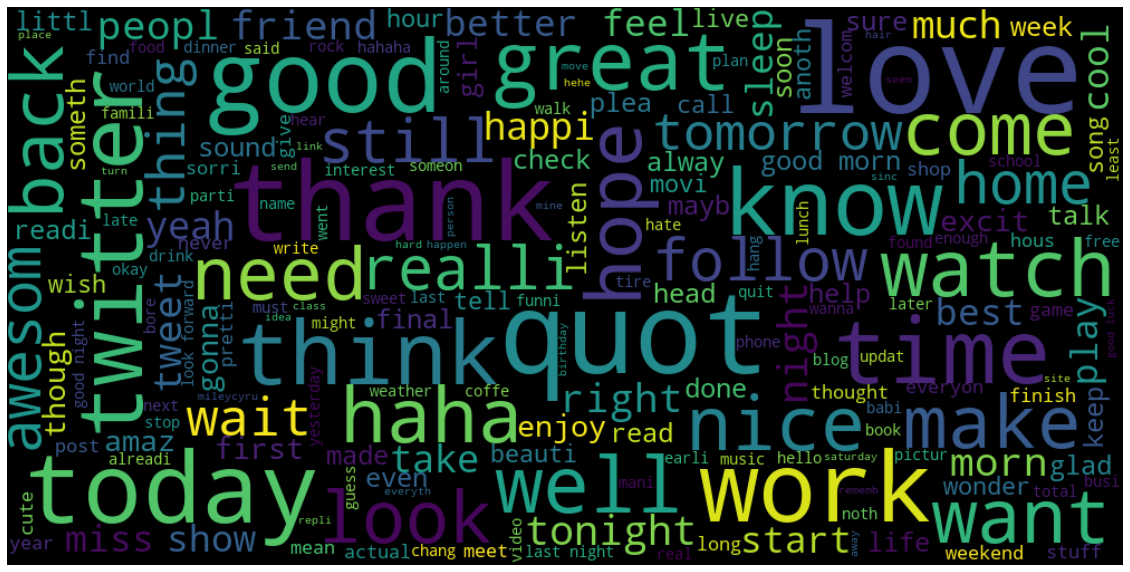

In [39]:
all_words = ' '.join([text for text in data['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=110).generate(all_words) 

plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<h3>Most Common Words | Positive</h3>

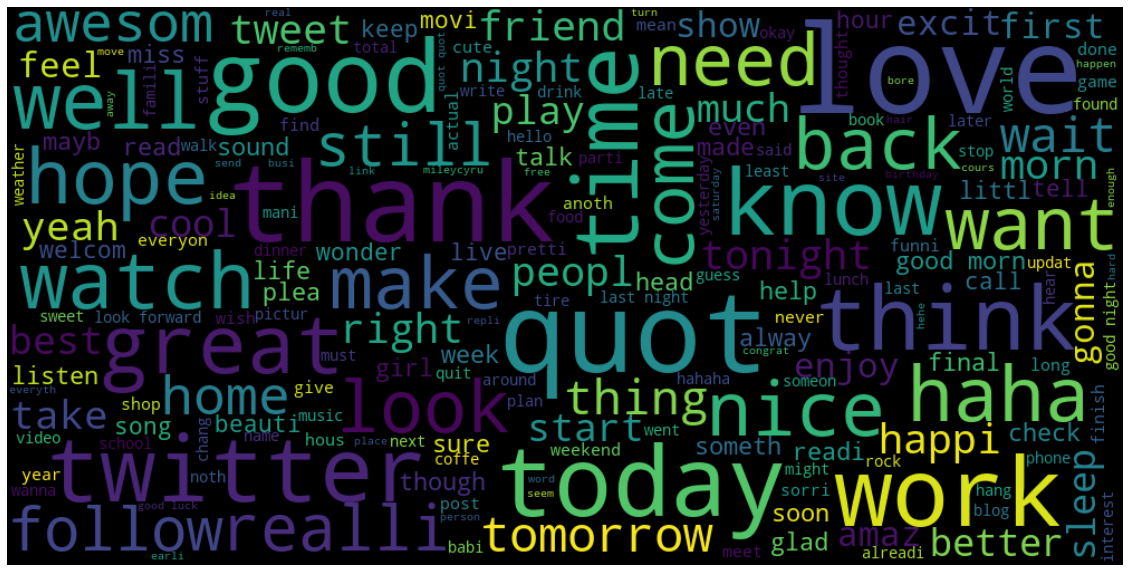

In [40]:
# Positive words
positive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 4]]) 
wordcloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=110).generate(positive_words)

plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<h3>Most Common Words | Negative/Depressed</h3>

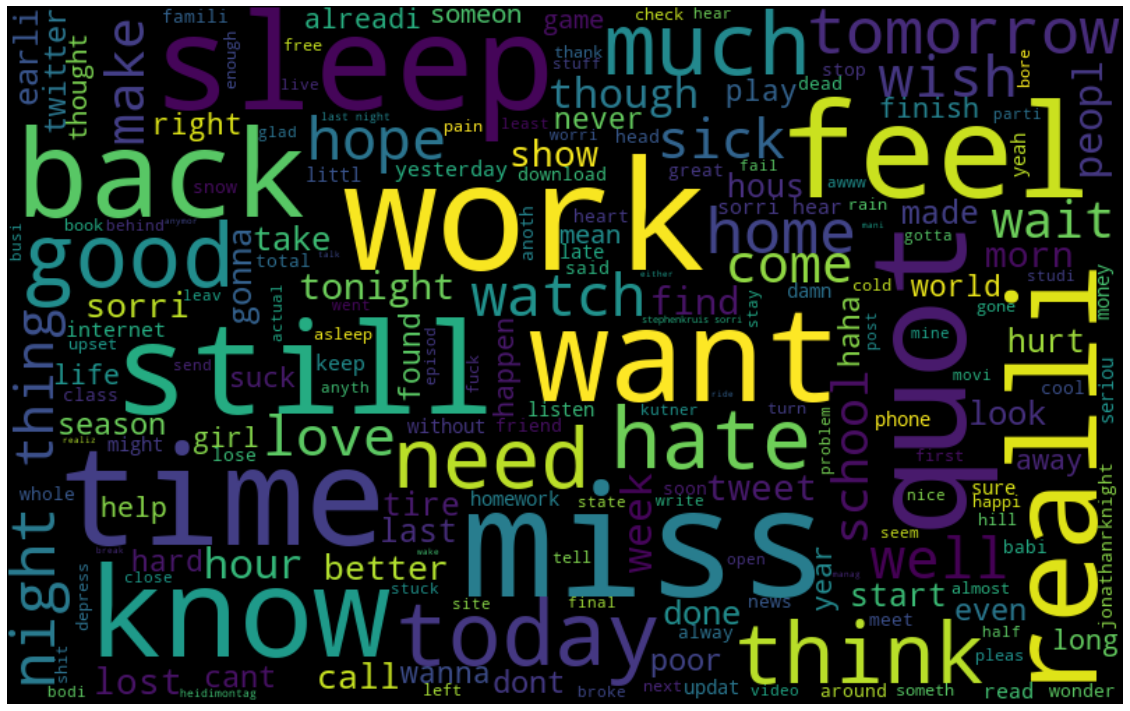

In [42]:
# Depressive words
depressive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

<h1>Model Building</h1>

<h3>Import Libraries</h3>

In [43]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import time

<h3>Analysis of Text in Comparison to the Stop Words</h3>

In [44]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(26000, 27119)

<h3>Splitting Into Train and Test Sets</h3>

In [45]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

<h1>Model Training</h1>

<h3>Python XGBClassifier</h3>

In [46]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)

start_time = time.time()
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
end_time = time.time()

xgbc_accuracy = accuracy_score(prediction_xgb, y_test)
xgbc_time = end_time - start_time
#print('Accuracy:', accuracy_score(prediction_xgb,y_test))

[23:24:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<h3>Random Forest Classifier</h3>

In [47]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

start_time = time.time()
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
end_time = time.time()

rf_accuracy = accuracy_score(prediction_rf,y_test)
rf_time = end_time - start_time
#print('Accuracy:', accuracy_score(prediction_rf,y_test))

<h3>Logistic Regression Model</h3>

In [48]:
lr = LogisticRegression()

start_time = time.time()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
end_time = time.time()

lr_accuracy = accuracy_score(prediction_lr,y_test)
lr_time = end_time - start_time

#print('Accuracy:', accuracy_score(prediction_lr,y_test))

<h3>Support Vector Machine C-Support Vector Classification Model</h3>

In [49]:
svc = svm.SVC()

start_time = time.time()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
end_time = time.time()

svc_accuracy = accuracy_score(prediction_svc,y_test)
svc_time = end_time - start_time

#print('Accuracy:', accuracy_score(prediction_svc,y_test))

<h1>Model Results</h1>

In [50]:
print("-------Python XGBClassifier-------")
print(' Accuracy:', xgbc_accuracy, '\n', 'Computation time: ', xgbc_time)
print("----------------------------------\n")

print("-------Random Forest Classifier-------")
print(' Accuracy:', rf_accuracy, '\n', 'Computation time: ', rf_time)
print("----------------------------------\n")

print("-------Logistic Regression Model-------")
print(' Accuracy:', lr_accuracy, '\n', 'Computation time: ', lr_time)
print("----------------------------------\n")

print("-------C-Support Vector Classification-------")
print(' Accuracy:', svc_accuracy, '\n', 'Computation time: ', svc_time)
print("----------------------------------")

-------Python XGBClassifier-------
 Accuracy: 0.9605769230769231 
 Computation time:  7.1348607540130615
----------------------------------

-------Random Forest Classifier-------
 Accuracy: 0.9592307692307692 
 Computation time:  1175.7462339401245
----------------------------------

-------Logistic Regression Model-------
 Accuracy: 0.9628846153846153 
 Computation time:  0.4743030071258545
----------------------------------

-------C-Support Vector Classification-------
 Accuracy: 0.9619230769230769 
 Computation time:  29.697139978408813
----------------------------------


<h1>&#9995; Done!</h1>